# 📊 Analyse Complète des Mouvements – Repos vs Frisson
Ce notebook permet de charger automatiquement les fichiers CSV de données de mouvement (repos/frisson), d'effectuer des statistiques descriptives et de comparer les signaux entre les différents scénarios enregistrés.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from scipy.fft import fft, fftfreq


sns.set(style="whitegrid")


In [3]:
# 📥 Charger les fichiers CSV manuellement
uploaded = files.upload()


Saving frisson.csv to frisson.csv
Saving frisson_allonge_FV.csv to frisson_allonge_FV.csv
Saving frisson_assis_bras_cote_FV.csv to frisson_assis_bras_cote_FV.csv
Saving frisson_assis_bras_table_FV.csv to frisson_assis_bras_table_FV.csv
Saving repos.csv to repos.csv
Saving repos_allongé_FV.csv to repos_allongé_FV.csv
Saving repos_assis_FV.csv to repos_assis_FV.csv
Saving repos_initial_FV.csv to repos_initial_FV.csv
Saving repos_rotation.csv to repos_rotation.csv


In [4]:
def charger_csv(fichier, label):
    df = pd.read_csv(fichier,encoding='latin1')
    df['source'] = fichier
    df['label'] = label
    return df


In [5]:
# 🔁 Liste de tous les fichiers à charger
fichiers = [
    ("repos_initial_FV.csv", "repos"),
    ("repos_assis_FV.csv", "repos"),
    ("repos_allongé_FV.csv", "repos"),
    ("frisson_assis_bras_table_FV.csv", "frisson"),
    ("frisson_assis_bras_cote_FV.csv", "frisson"),
    ("frisson_allonge_FV.csv", "frisson")
]

# 📥 Chargement automatique de tous les fichiers
dfs = []
for nom, label in fichiers:
    df = charger_csv(nom, label)
    dfs.append(df)

# 🧩 Fusion des fichiers
df_all = pd.concat(dfs, ignore_index=True)


In [6]:
# 📊 Statistiques descriptives globales par classe
print("=== 📊 Statistiques descriptives par CLASSE ===")
df_all.groupby("label")[['accel.x','accel.y','accel.z']].describe()


=== 📊 Statistiques descriptives par CLASSE ===


accel.x                                                    accel.y  \
          count      mean       std   min   25%    50%   75%   max   count   
label                                                                        
frisson  3130.0 -1.399355  1.217188 -5.08 -2.09 -1.625 -0.54  2.45  3130.0   
repos    3108.0 -1.878900  0.979348 -3.10 -2.91 -2.100 -0.62 -0.40  3108.0   

                   ...             accel.z                                    \
             mean  ...   75%   max   count      mean       std    min    25%   
label              ...                                                         
frisson  2.478636  ...  8.79  9.18  3130.0 -9.051281  3.112632 -12.52 -11.32   
repos    2.526255  ...  8.69  8.83  3108.0 -8.877661  3.274269 -11.63 -11.33   

                            
           50%   75%   max  
label                       
frisson -11.07 -4.82 -3.86  
repos   -11.09 -4.36 -4.16  

[2 rows x 24 columns]

In [7]:
# 📋 Statistiques descriptives par fichier
print("=== 📋 Statistiques par FICHIER ===")
for df in dfs:
    print(f"📁 {df['source'].iloc[0]}")
    display(df[['accel.x', 'accel.y', 'accel.z']].describe())
    print("-" * 60)


=== 📋 Statistiques par FICHIER ===
📁 repos_initial_FV.csv


accel.x      accel.y      accel.z
count  1059.000000  1059.000000  1059.000000
mean     -2.938215     8.718933    -4.326903
std       0.050340     0.038232     0.050734
min      -3.100000     8.570000    -4.540000
25%      -2.970000     8.690000    -4.360000
50%      -2.940000     8.720000    -4.330000
75%      -2.910000     8.740000    -4.290000
max      -2.750000     8.830000    -4.160000

------------------------------------------------------------
📁 repos_assis_FV.csv


accel.x      accel.y      accel.z
count  1015.000000  1015.000000  1015.000000
mean     -2.093507    -0.470138   -11.096424
std       0.058282     0.046693     0.045207
min      -2.300000    -0.880000   -11.630000
25%      -2.130000    -0.490000   -11.120000
50%      -2.100000    -0.470000   -11.100000
75%      -2.070000    -0.450000   -11.070000
max      -1.480000     0.560000   -10.770000

------------------------------------------------------------
📁 repos_allongé_FV.csv


accel.x      accel.y      accel.z
count  1034.000000  1034.000000  1034.000000
mean     -0.583308    -0.874816   -11.360455
std       0.055083     0.047434     0.053742
min      -0.790000    -1.230000   -11.620000
25%      -0.620000    -0.900000   -11.390000
50%      -0.580000    -0.870000   -11.360000
75%      -0.550000    -0.850000   -11.330000
max      -0.400000    -0.700000   -11.060000

------------------------------------------------------------
📁 frisson_assis_bras_table_FV.csv


accel.x      accel.y      accel.z
count  1032.000000  1032.000000  1032.000000
mean     -1.859351    -0.475262   -11.145911
std       0.449984     0.109464     0.210317
min      -3.940000    -0.850000   -12.200000
25%      -2.090000    -0.540000   -11.250000
50%      -1.870000    -0.480000   -11.130000
75%      -1.640000    -0.410000   -11.020000
max      -0.080000     0.020000   -10.400000

------------------------------------------------------------
📁 frisson_assis_bras_cote_FV.csv


accel.x      accel.y      accel.z
count  1050.000000  1050.000000  1050.000000
mean     -2.134629     8.847629    -4.687981
std       1.136658     0.093391     0.252898
min      -5.080000     8.490000    -5.440000
25%      -2.897500     8.790000    -4.830000
50%      -2.080000     8.850000    -4.700000
75%      -1.312500     8.910000    -4.540000
max       0.940000     9.180000    -3.860000

------------------------------------------------------------
📁 frisson_allonge_FV.csv


accel.x      accel.y      accel.z
count  1048.000000  1048.000000  1048.000000
mean     -0.209704    -0.993712   -11.360258
std       0.875471     0.196015     0.304509
min      -4.280000    -1.750000   -12.520000
25%      -0.750000    -1.130000   -11.500000
50%      -0.260000    -1.000000   -11.370000
75%       0.390000    -0.860000   -11.200000
max       2.450000    -0.180000   -10.030000

------------------------------------------------------------


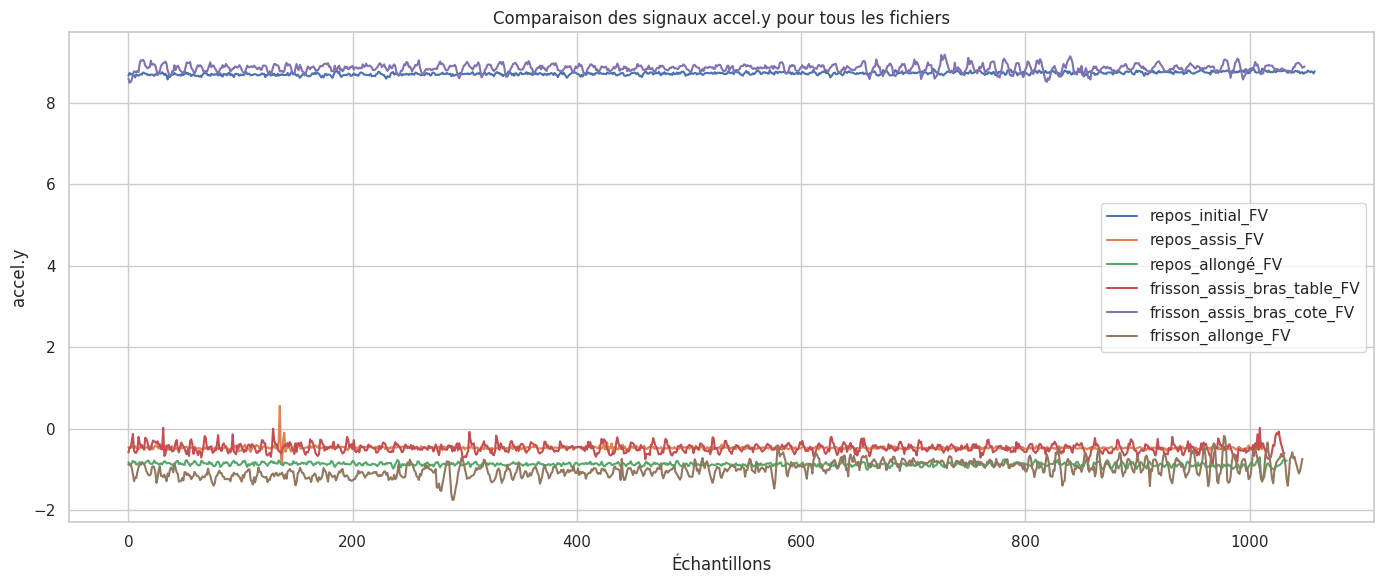

In [8]:
# 📈 Tracé comparatif des accel.y
plt.figure(figsize=(14,6))
for df in dfs:
    plt.plot(df['accel.y'], label=df['source'].iloc[0].replace(".csv", ""))
plt.title("Comparaison des signaux accel.y pour tous les fichiers")
plt.xlabel("Échantillons")
plt.ylabel("accel.y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 🔁 Partie 2 : FFT et Analyse Gyroscope

In [9]:

def analyse_fft(df, axe, titre="", fs=71.4):
    signal = df[axe].values
    signal = signal - np.mean(signal)  #  Suppression de la composante continue (DC)

    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1/fs)

    plt.figure(figsize=(10,4))
    plt.plot(xf[:N//2], np.abs(yf[:N//2]))
    plt.title(f"Spectre de fréquencea(FFT) - {axe} - {titre}")
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


--- repos_initial_FV ---


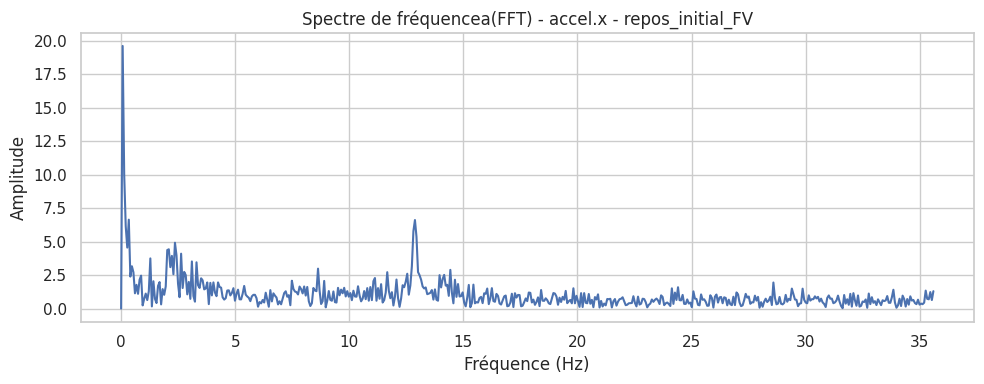

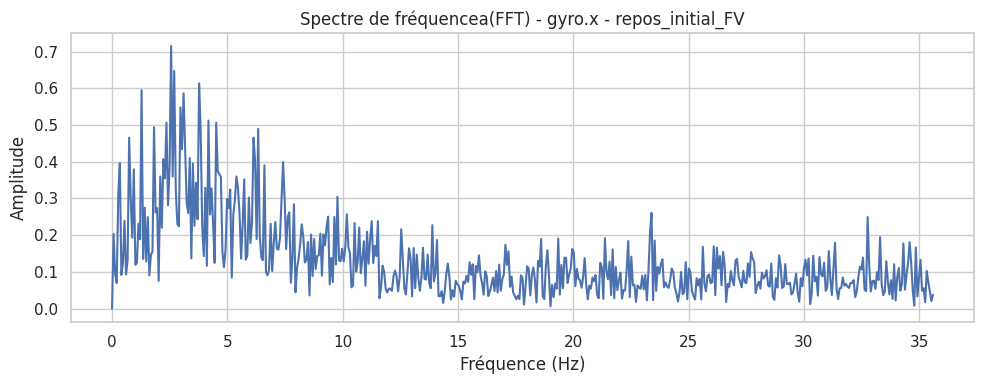

--- repos_assis_FV ---


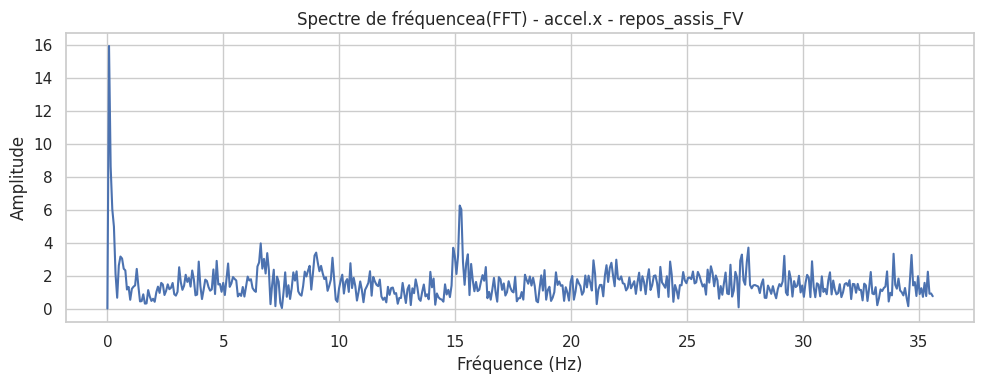

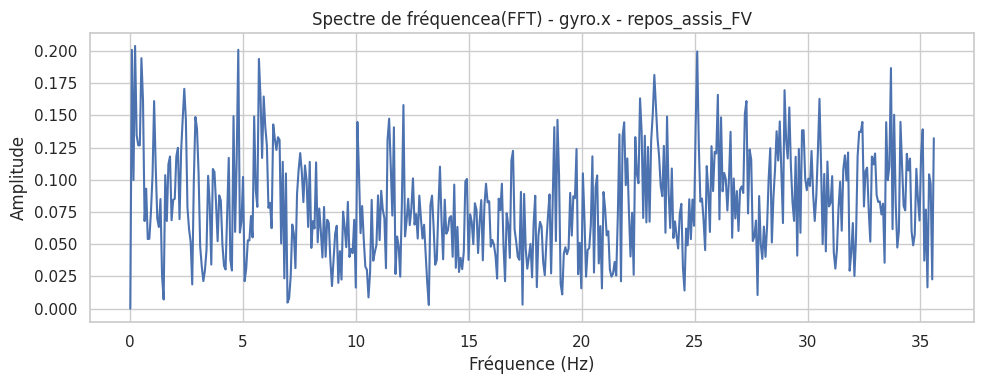

--- repos_allongé_FV ---


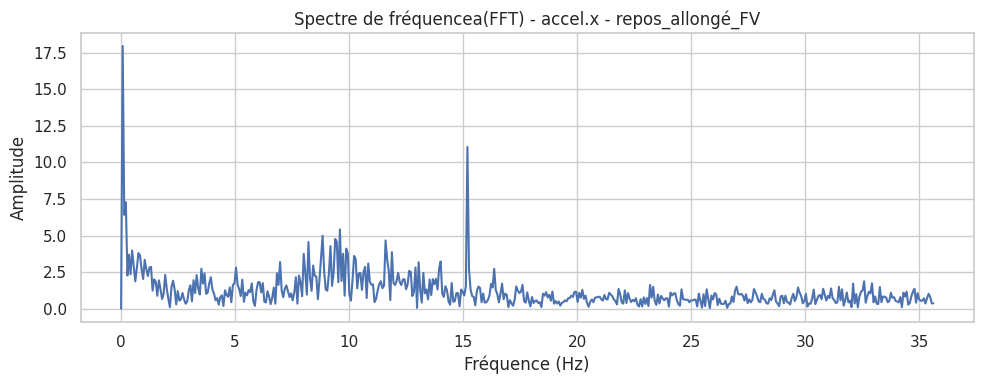

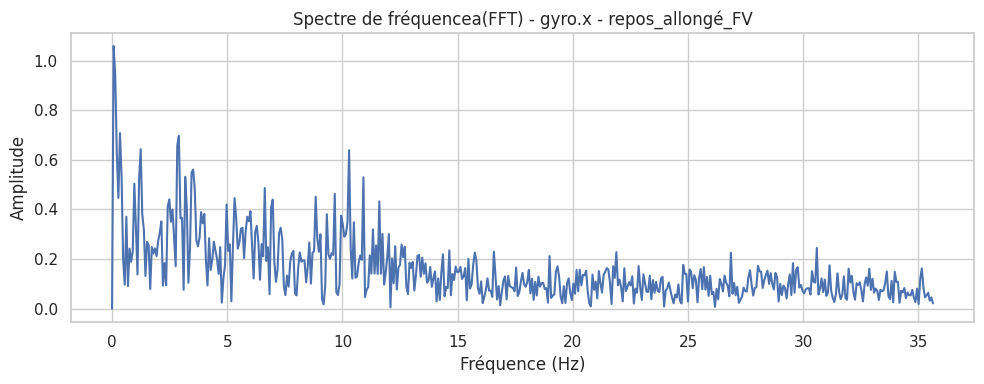

--- frisson_assis_bras_table_FV ---


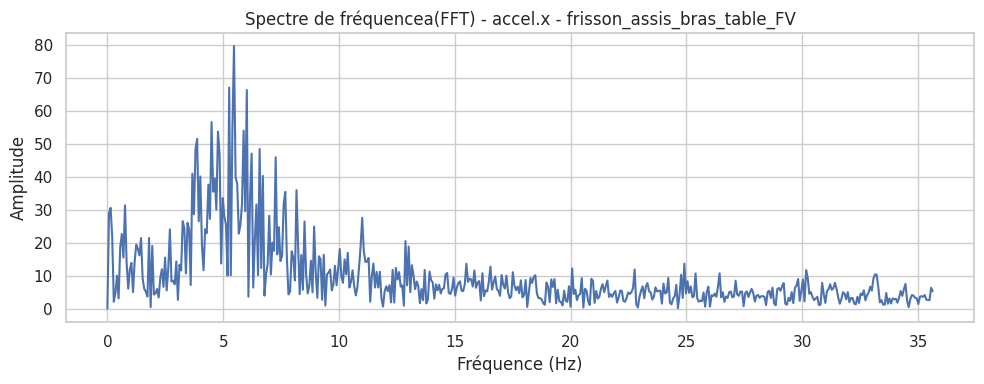

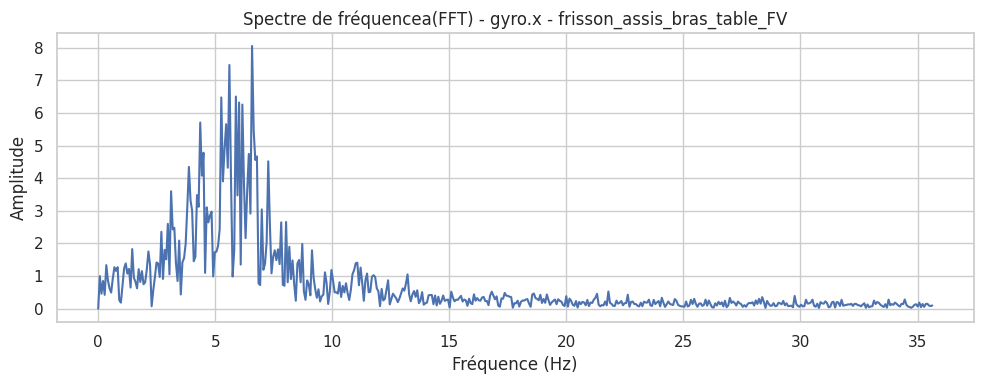

--- frisson_assis_bras_cote_FV ---


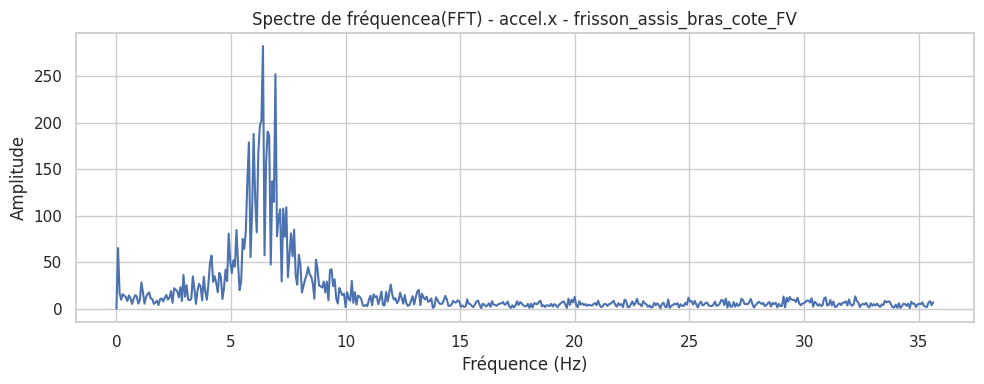

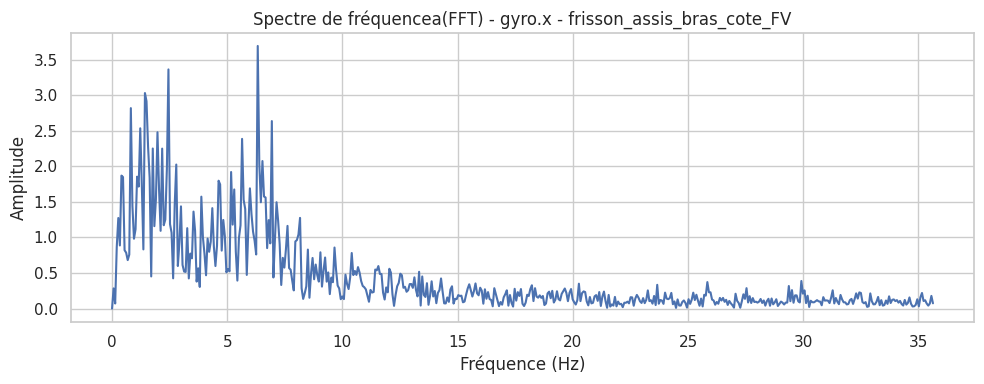

--- frisson_allonge_FV ---


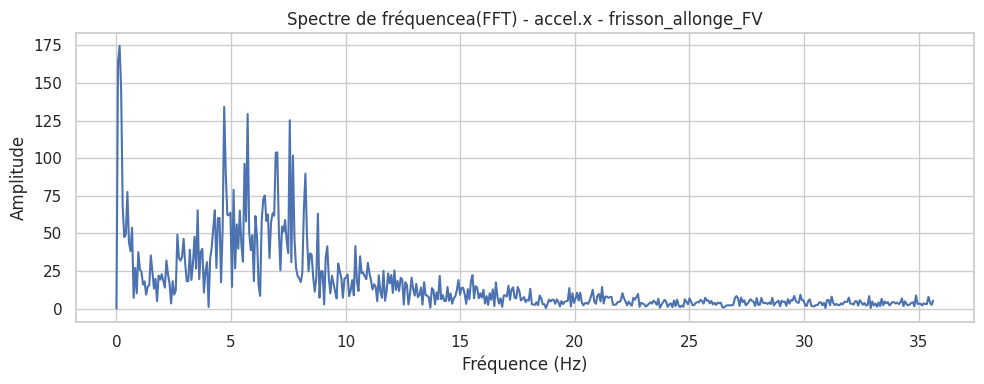

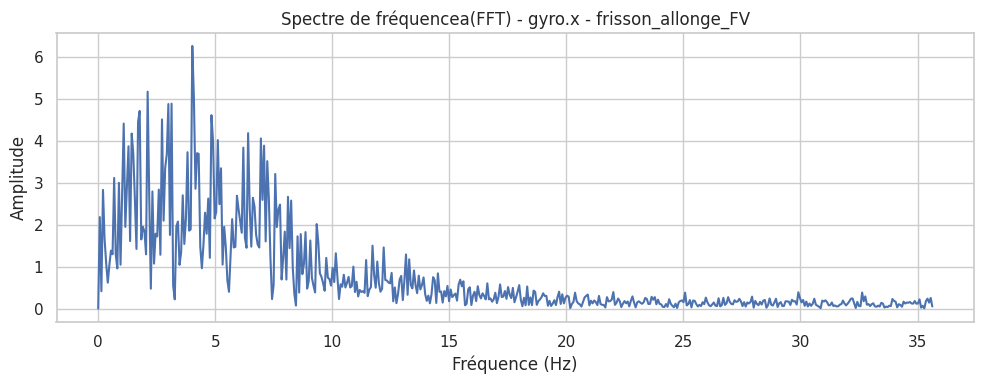

In [10]:
# Appliquer FFT à tous les fichiers (accel.x et gyro.x)
for df in dfs:
    titre = df['source'].iloc[0].replace('.csv', '')
    print(f"--- {titre} ---")
    analyse_fft(df, 'accel.x', titre)
    analyse_fft(df, 'gyro.x', titre)


--- repos_initial_FV ---


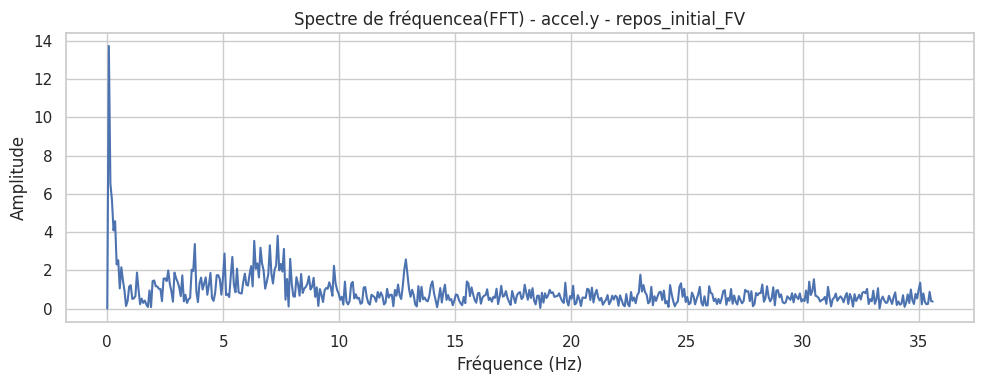

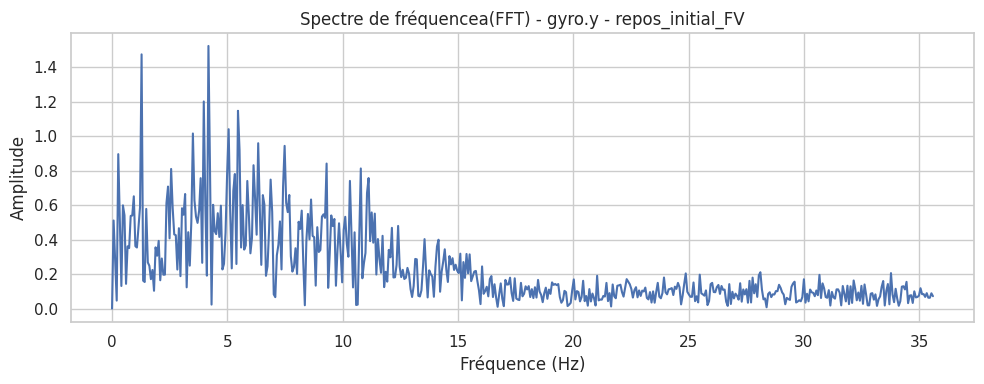

--- repos_assis_FV ---


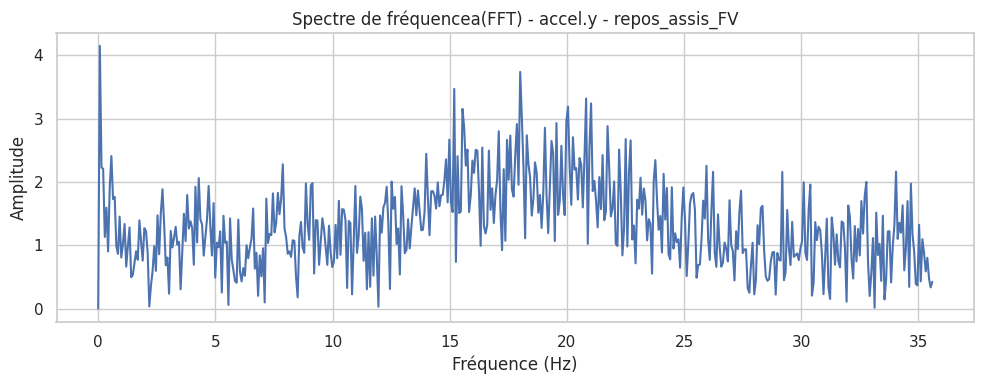

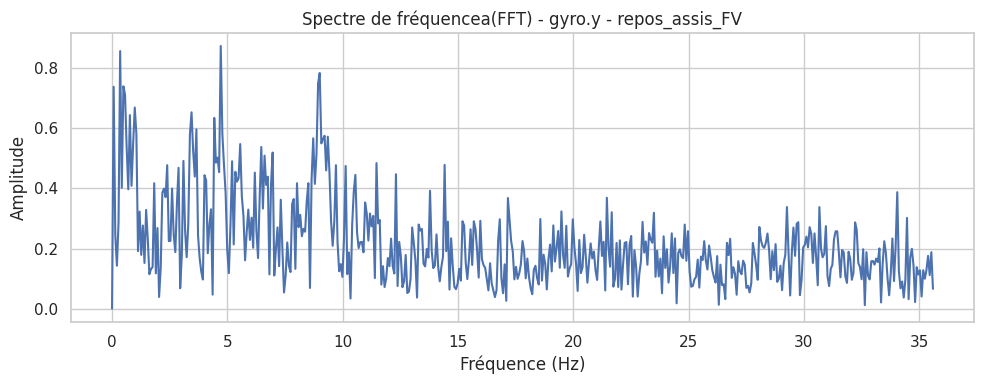

--- repos_allongé_FV ---


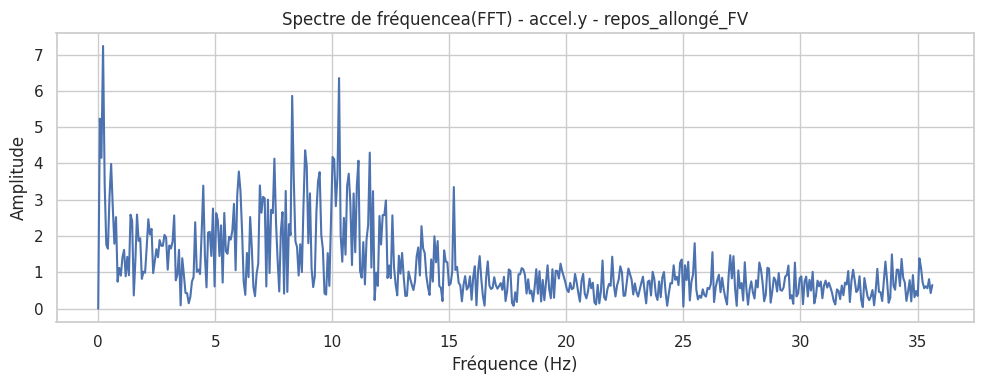

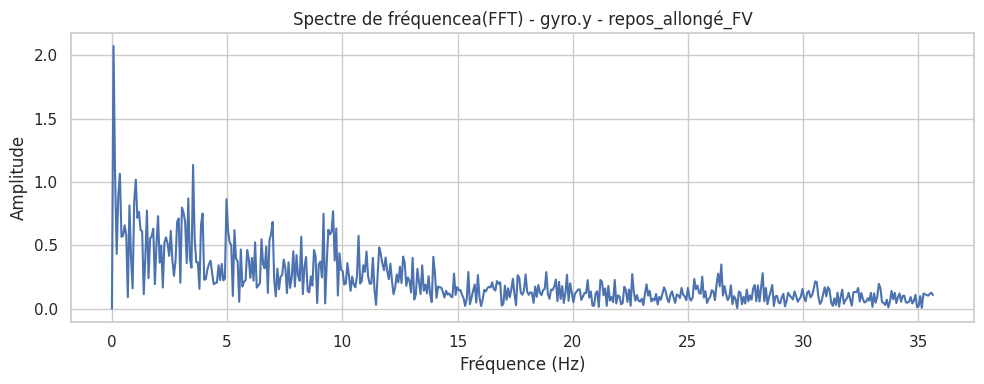

--- frisson_assis_bras_table_FV ---


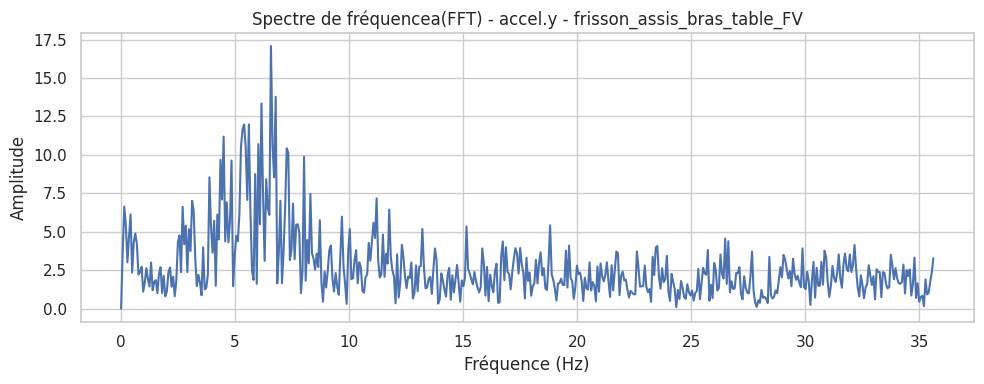

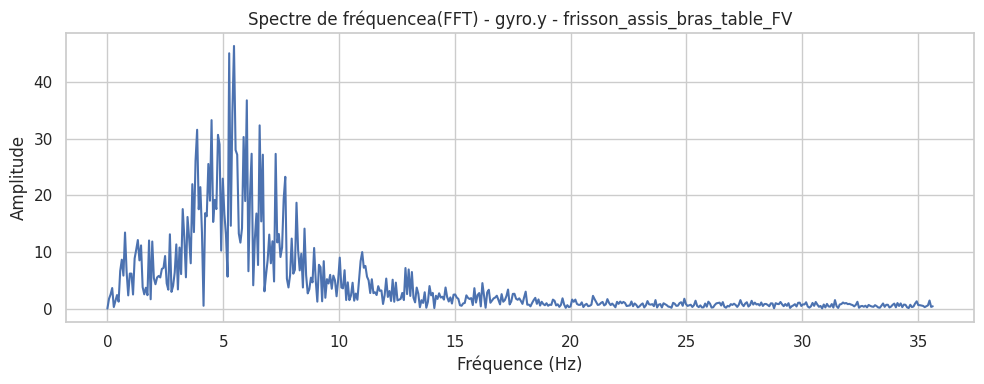

--- frisson_assis_bras_cote_FV ---


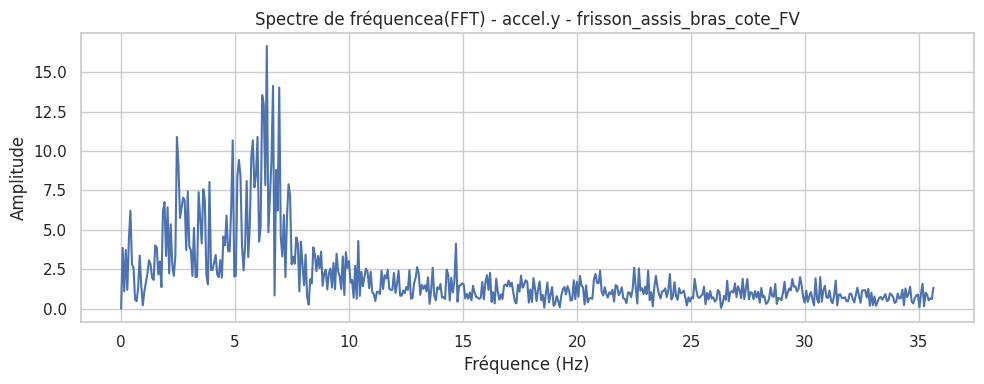

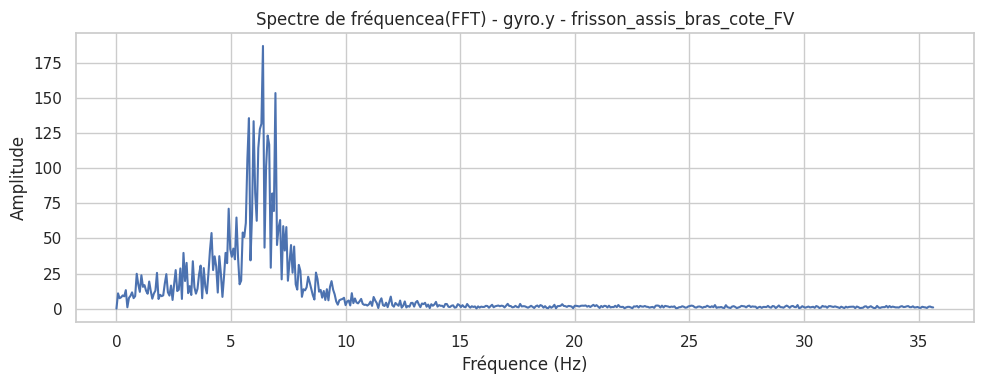

--- frisson_allonge_FV ---


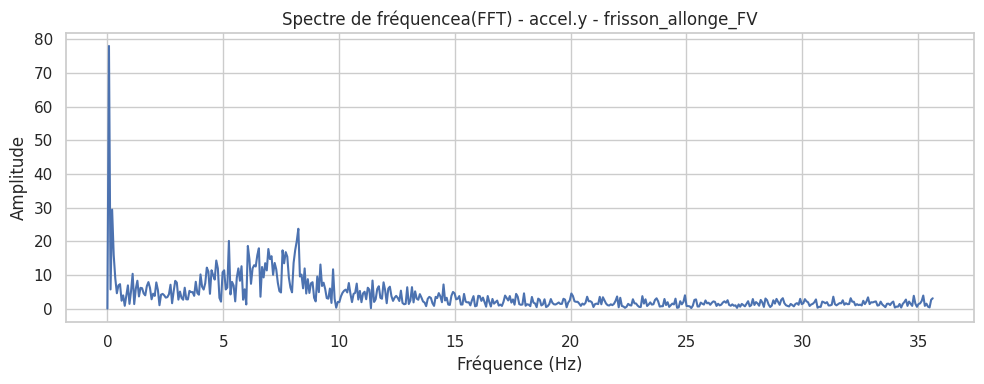

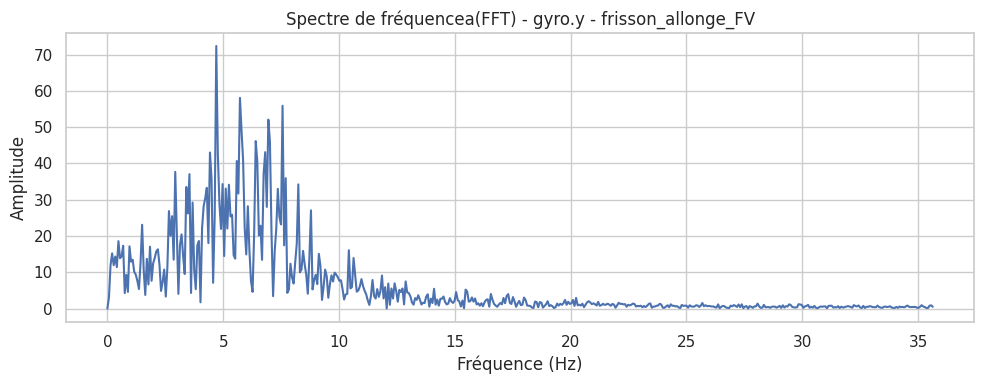

In [ ]:
# Appliquer FFT à tous les fichiers (accel.y et gyro.y)
for df in dfs:
    titre = df['source'].iloc[0].replace('.csv', '')
    print(f"--- {titre} ---")
    analyse_fft(df, 'accel.y', titre)
    analyse_fft(df, 'gyro.y', titre)


--- repos_initial_FV ---


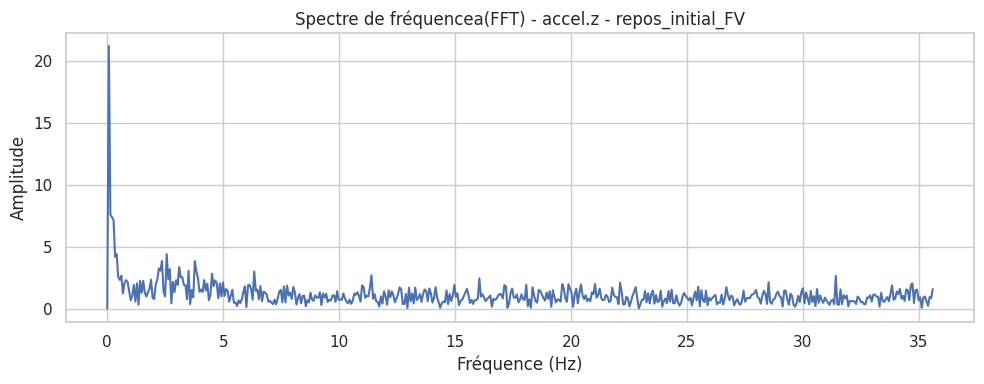

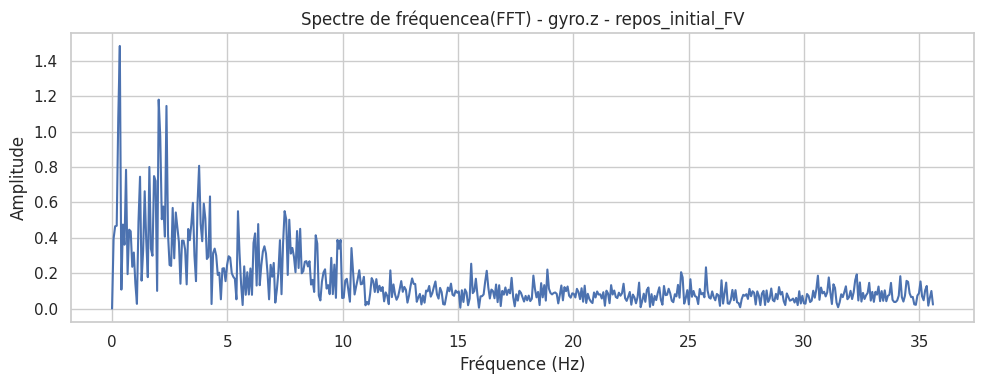

--- repos_assis_FV ---


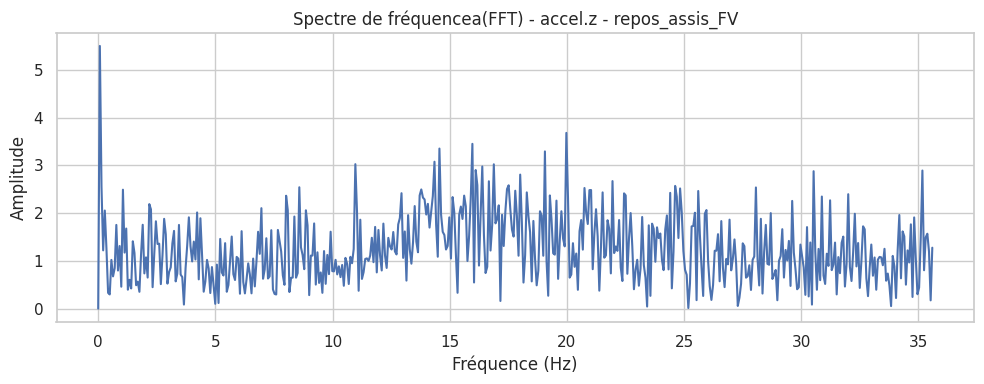

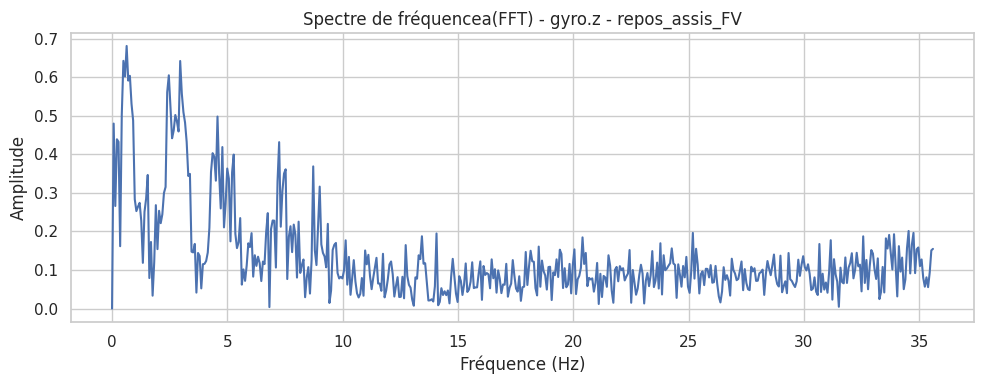

--- repos_allongé_FV ---


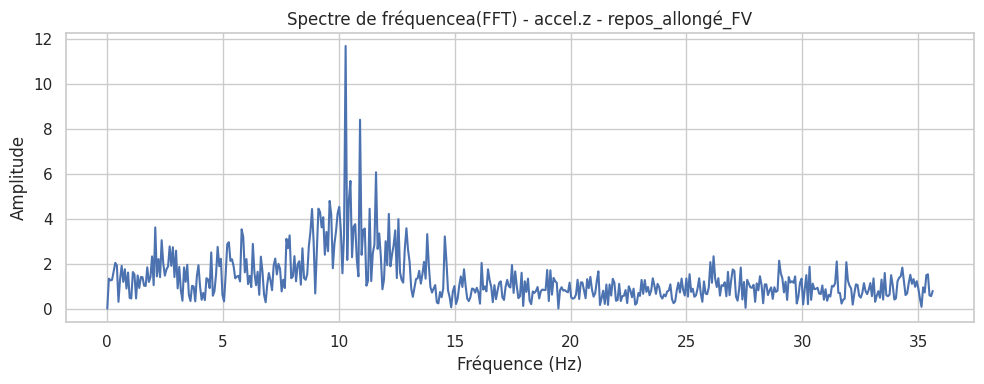

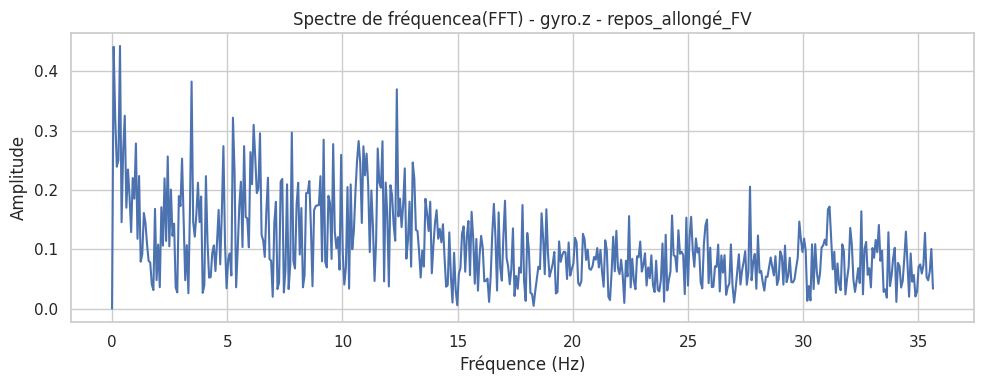

--- frisson_assis_bras_table_FV ---


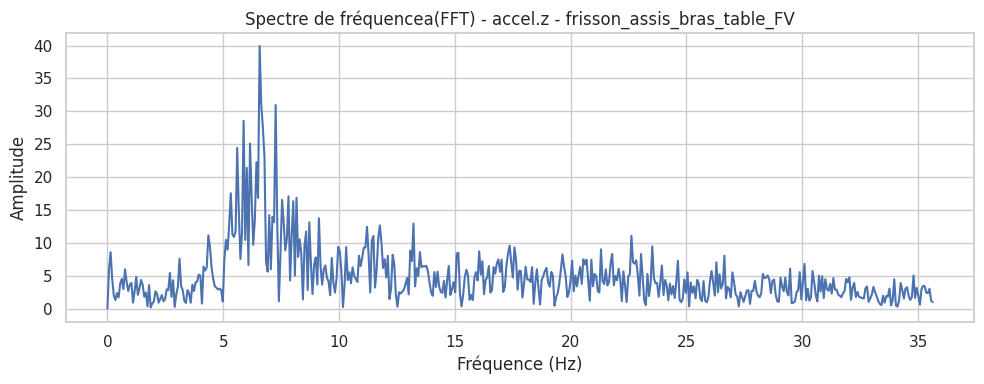

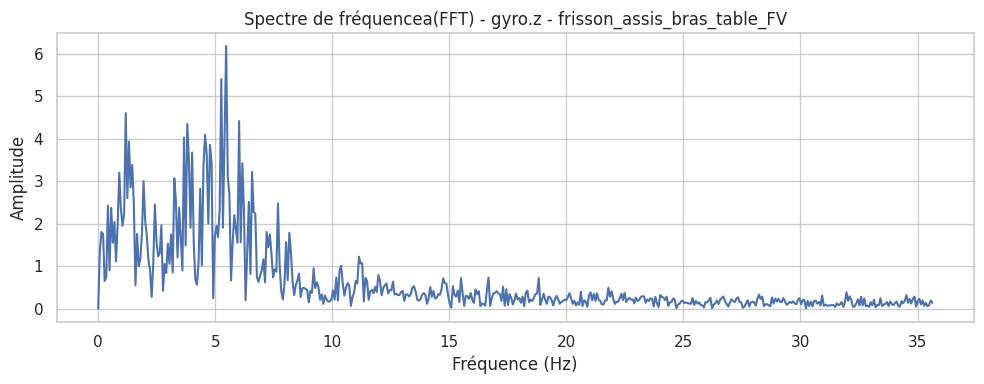

--- frisson_assis_bras_cote_FV ---


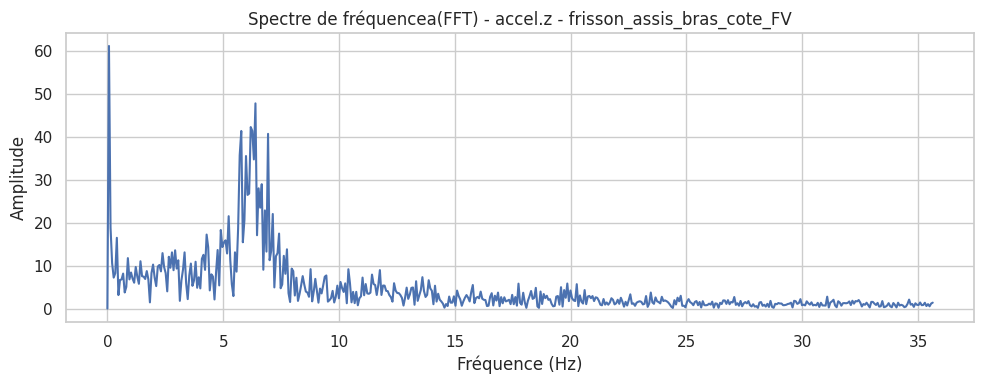

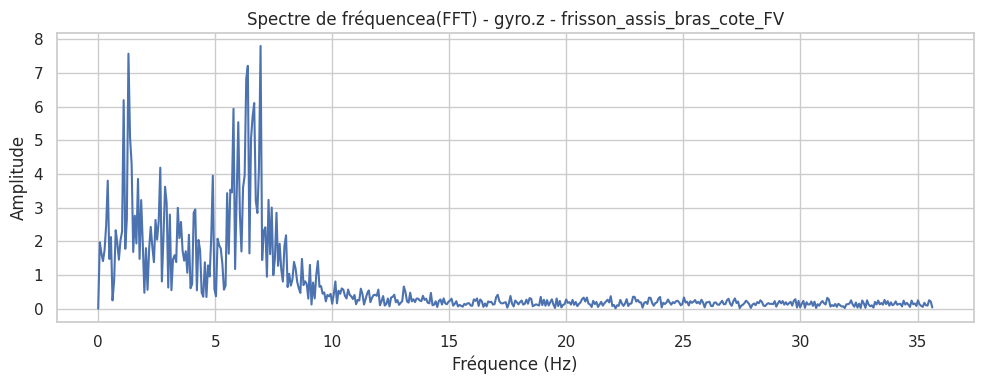

--- frisson_allonge_FV ---


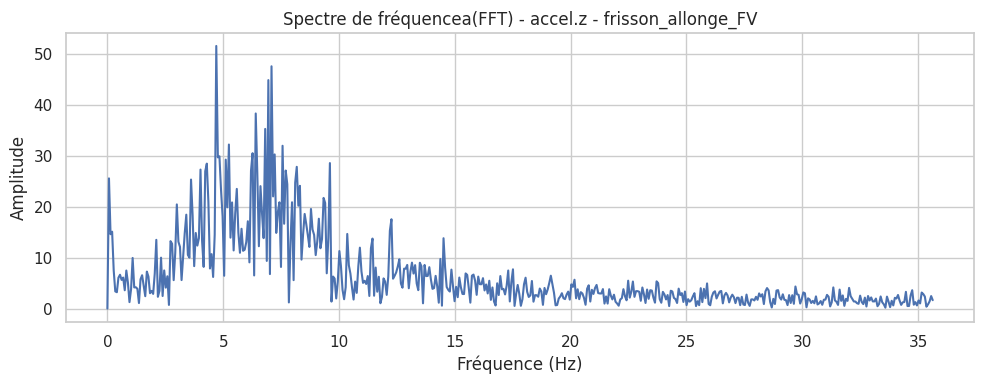

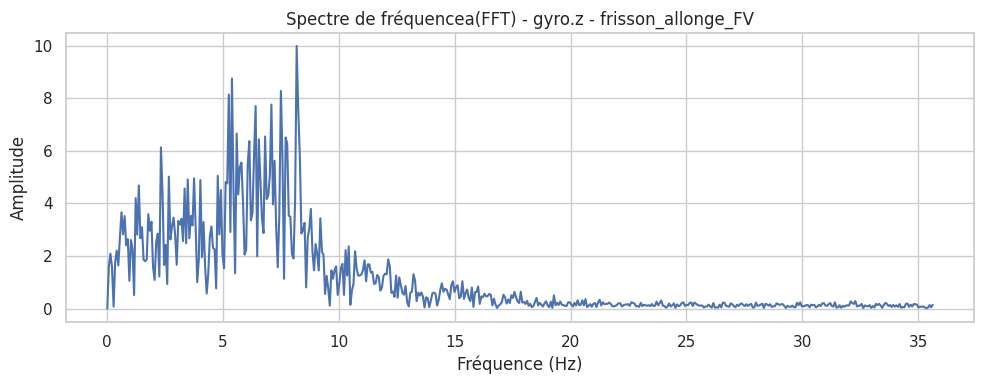

In [ ]:
# Appliquer FFT à tous les fichiers (accel.z et gyro.z)
for df in dfs:
    titre = df['source'].iloc[0].replace('.csv', '')
    print(f"--- {titre} ---")
    analyse_fft(df, 'accel.z', titre)
    analyse_fft(df, 'gyro.z', titre)


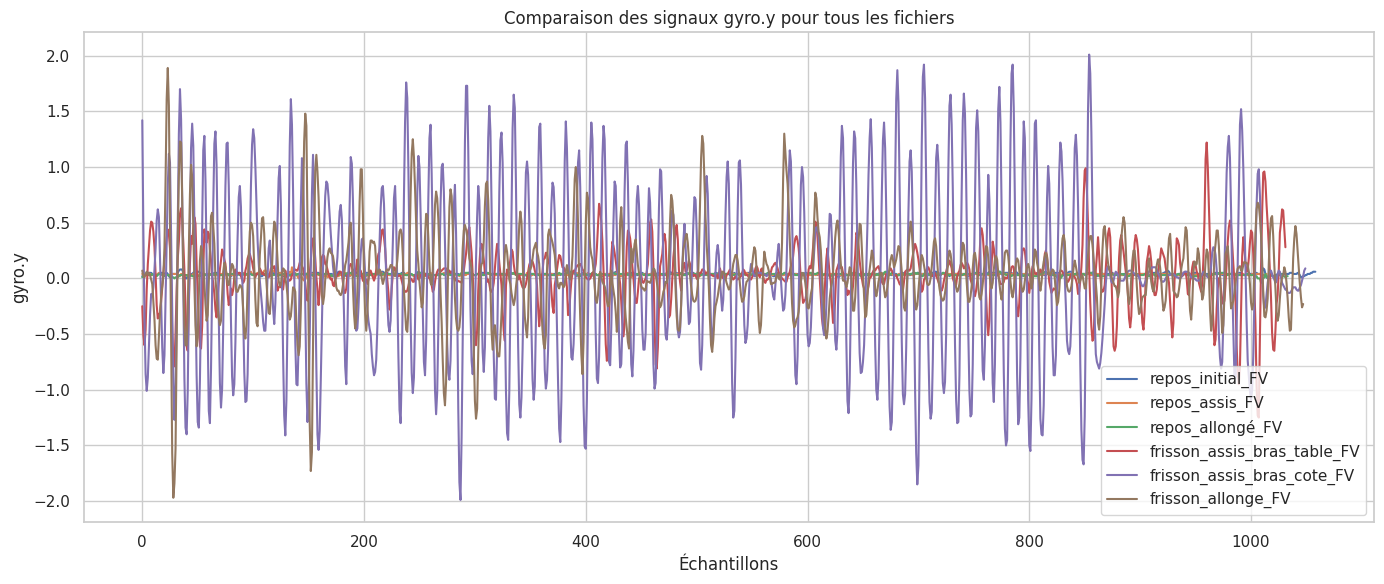

In [11]:
plt.figure(figsize=(14,6))
for df in dfs:
    plt.plot(df['gyro.y'], label=df['source'].iloc[0].replace(".csv", ""))
plt.title("Comparaison des signaux gyro.y pour tous les fichiers")
plt.xlabel("Échantillons")
plt.ylabel("gyro.y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 📊 Visualisation des 3 axes `accel` et `gyro` pour chaque fichier

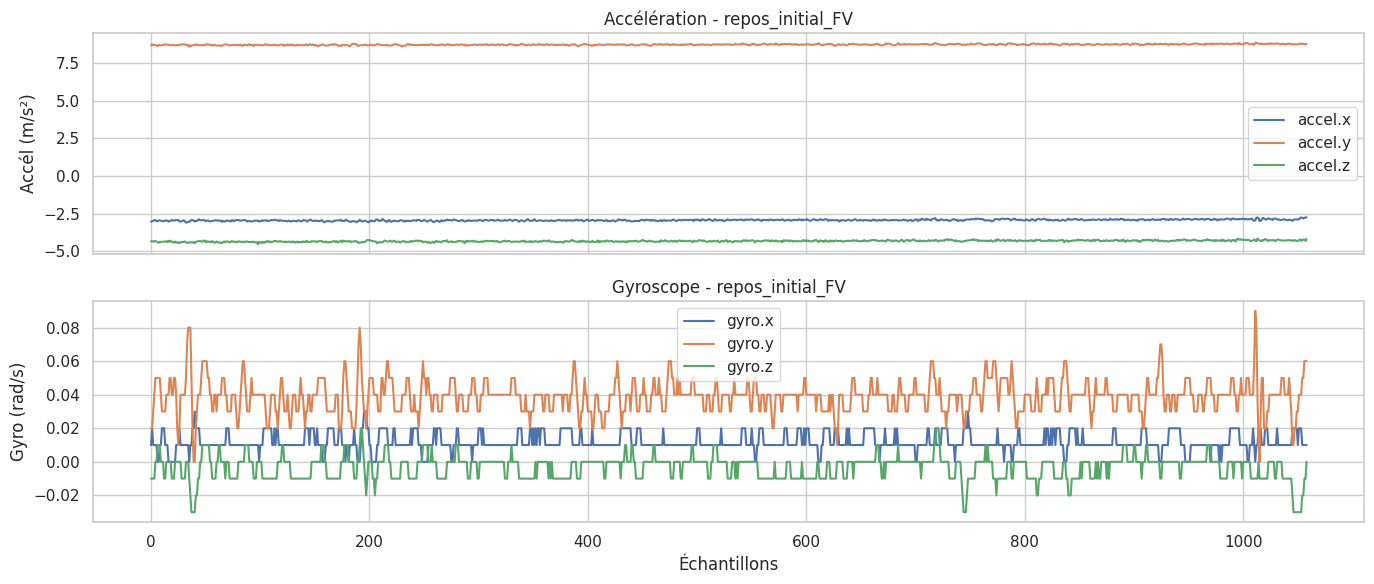

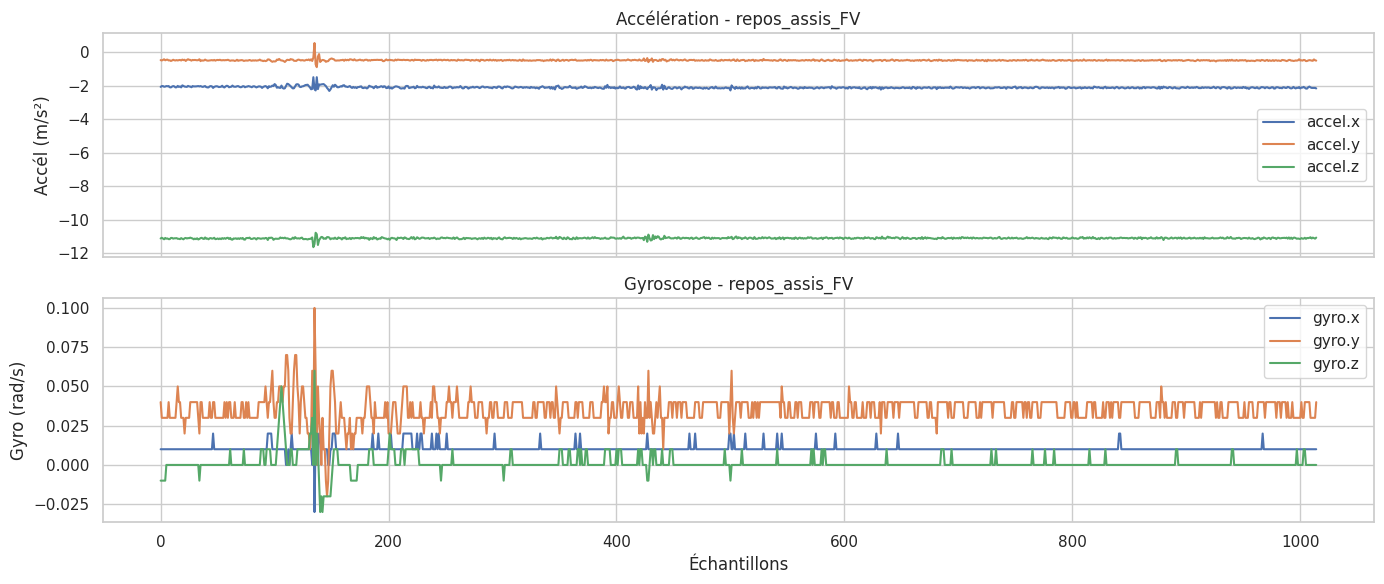

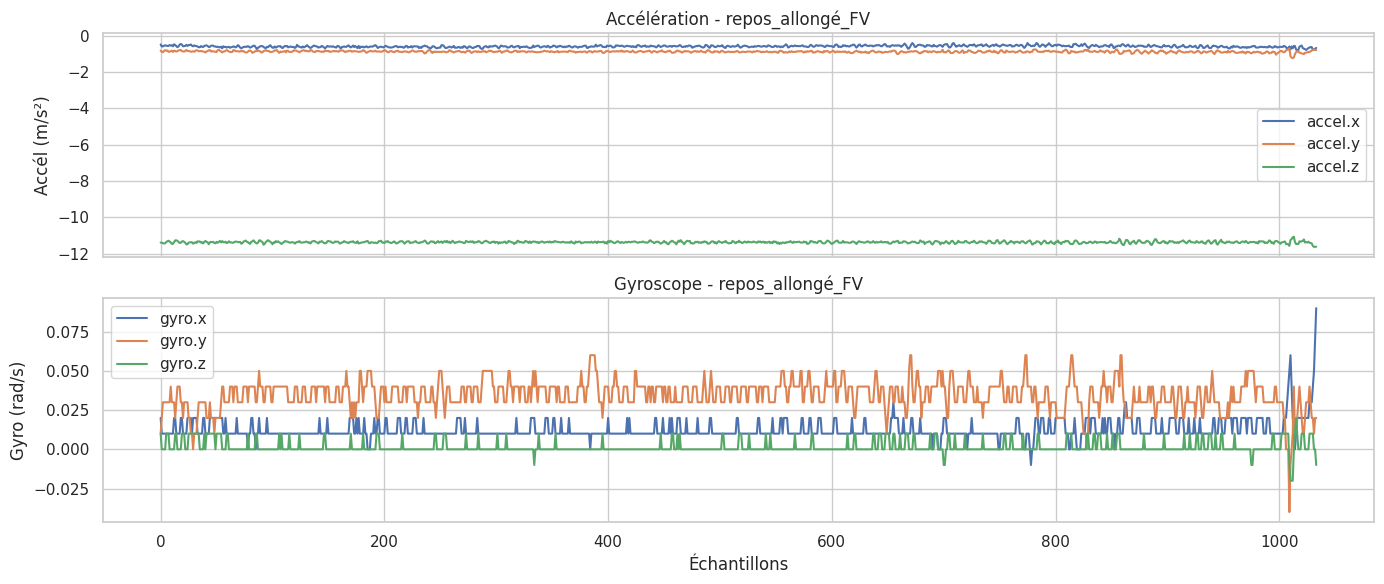

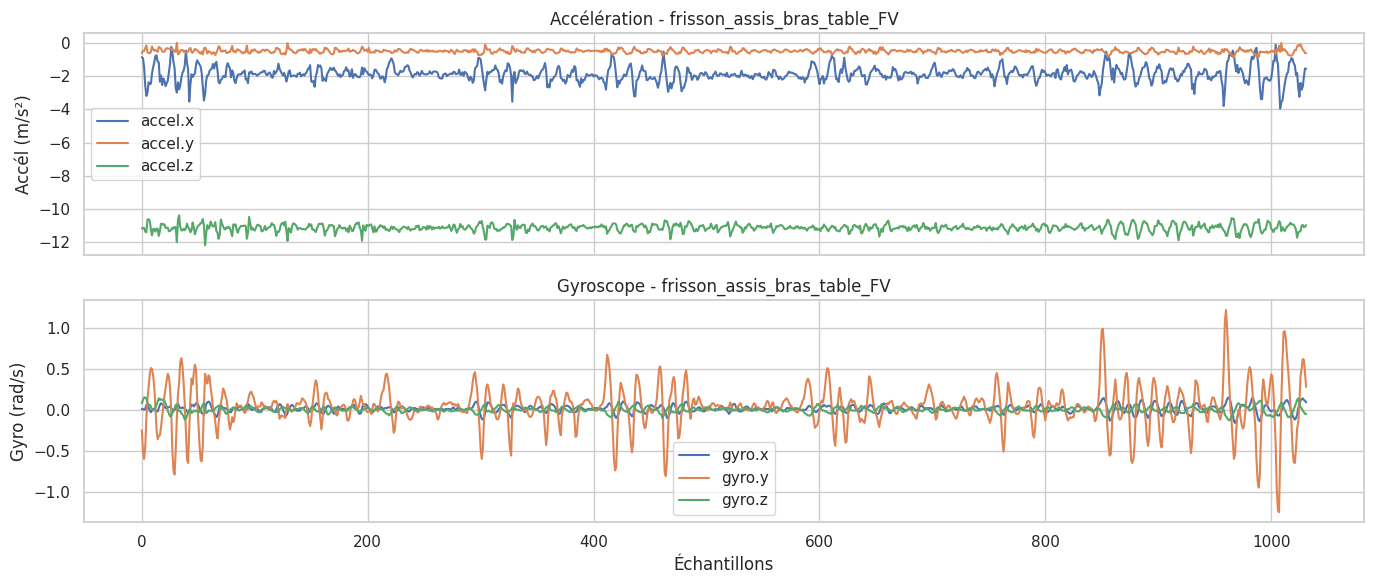

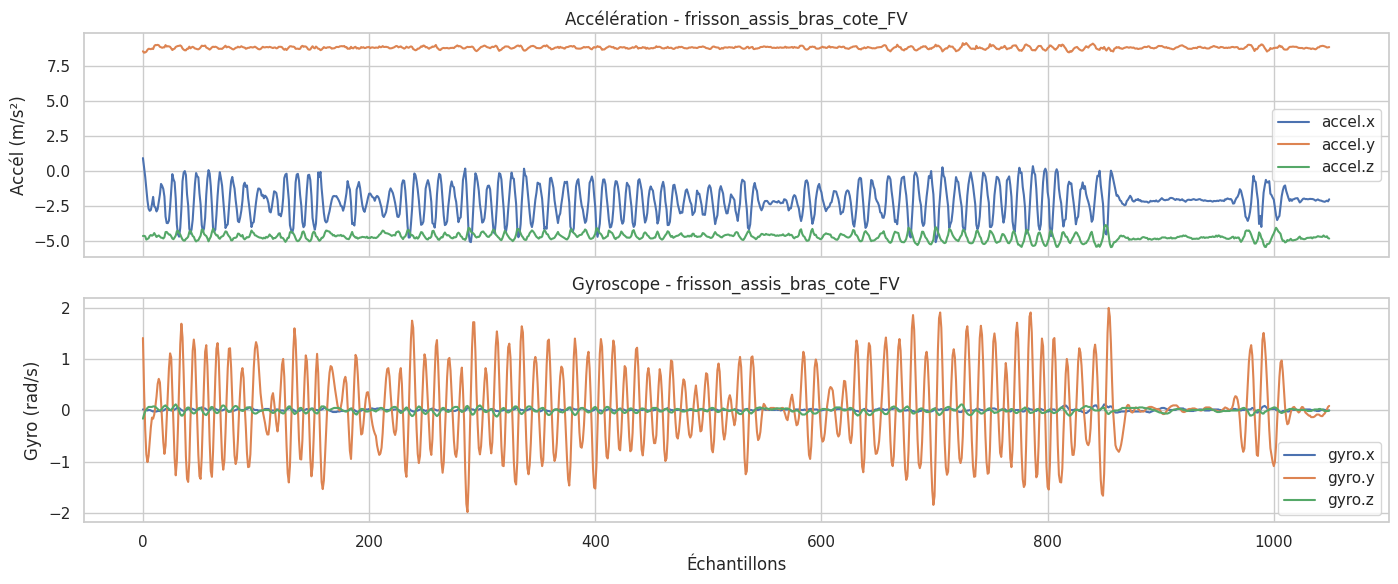

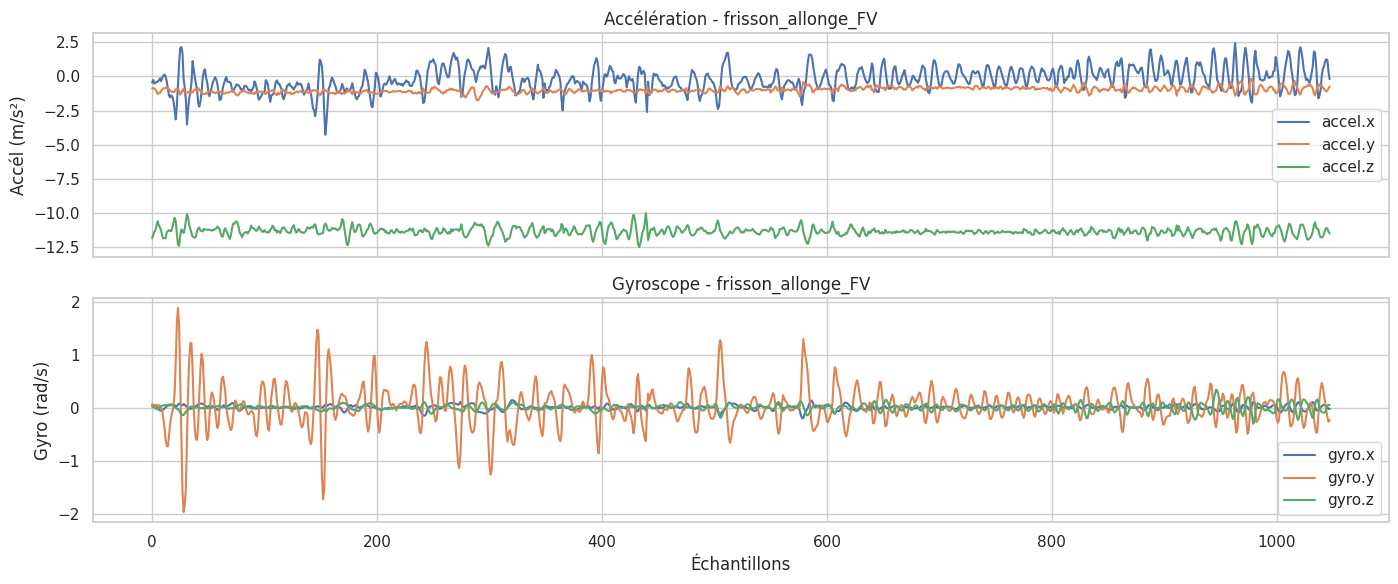

In [12]:
# 📈 Tracé des 3 axes accel et gyro pour chaque fichier
for df in dfs:
    titre = df['source'].iloc[0].replace(".csv", "")

    fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

    # Accélération
    axs[0].plot(df['accel.x'], label='accel.x')
    axs[0].plot(df['accel.y'], label='accel.y')
    axs[0].plot(df['accel.z'], label='accel.z')
    axs[0].set_title(f"Accélération - {titre}")
    axs[0].set_ylabel("Accél (m/s²)")
    axs[0].legend()
    axs[0].grid(True)

    # Gyroscope
    axs[1].plot(df['gyro.x'], label='gyro.x')
    axs[1].plot(df['gyro.y'], label='gyro.y')
    axs[1].plot(df['gyro.z'], label='gyro.z')
    axs[1].set_title(f"Gyroscope - {titre}")
    axs[1].set_xlabel("Échantillons")
    axs[1].set_ylabel("Gyro (rad/s)")
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


In [17]:

from scipy.signal import butter, filtfilt

def filtre_passe_bas(signal, cutoff=20, fs=71.4, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Appliquer le filtre sur accel.x du premier fichier pour visualisation
df = dfs[0]  # premier fichier de la liste
df['accel.x_filtré'] = filtre_passe_bas(df['accel.x'], cutoff=10)


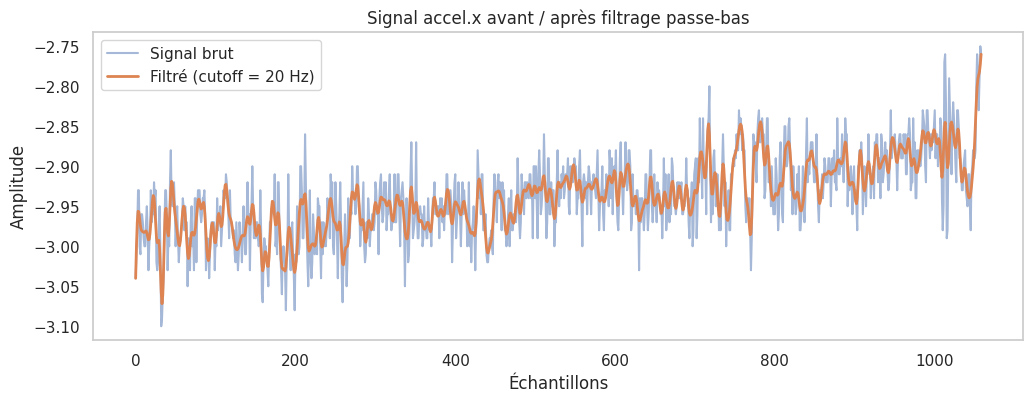

In [18]:

# Tracer signal original vs filtré
plt.figure(figsize=(12, 4))
plt.plot(df['accel.x'], label='Signal brut', alpha=0.5)
plt.plot(df['accel.x_filtré'], label='Filtré (cutoff = 20 Hz)', linewidth=2)
plt.title("Signal accel.x avant / après filtrage passe-bas")
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()
